# LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# 1. Data Importation

In [2]:
train=pd.read_csv(r'C:\Users\HP\Documents\ML\TITANIC\titanic\train.csv')
test=pd.read_csv(r'C:\Users\HP\Documents\ML\TITANIC\titanic\test.csv')

In [3]:
#Training set
print(train.shape)
train[:2]

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
#Test set
print(test.shape)
test[:2]

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


# 2. Exploratory Data Analysis

   #        2.1 Data types and Summary statistics

In [5]:
#Data Types for train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Data types for test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
#Missing values in my train set from highest to lowest
train.isna().sum().sort_values(ascending= False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [8]:
#Missing values in my test set from highest to lowest
test.isna().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [9]:
#Train set summary statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Test set summary statistics
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 2.2 Data Cleaning

In [11]:
#Dropping Unnecessary columns

train=train.drop(columns=['Ticket'],axis=1)
test=test.drop(columns=['Ticket'],axis=1)

In [12]:
#Filling missing Values of Numeric variables in train set

train['Age'].fillna(train['Age'].median(),inplace=True) #Filling the missing values with the median age
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#Filling missing Values of Categorical variables in train set

cab=train['Cabin'].dropna().mode()[0]  #Finding the modal cabin class
emb=train['Embarked'].dropna().mode()[0]  #Finding the modal location class

train['Cabin'].fillna(cab,inplace=True) #Filling the missing values with the mode
train['Embarked'].fillna(emb,inplace=True)  #Filling the missing values with the mode


for i in train.index:
    train['Cabin'][i]= train['Cabin'][i][0] #To generalize the cabins we take the first letter to represent a cabin
train['Cabin'][339]='B' #Cabin T was only recorded once therefore has no influence on survival

train.isna().sum() #Confirm no missing values

C:\Users\HP\AppData\Local\Temp/ipykernel_5700/2701448067.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cabin'][i]= train['Cabin'][i][0] #To generalize the cabins we take the first letter to represent a cabin
C:\Users\HP\AppData\Local\Temp/ipykernel_5700/2701448067.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cabin'][339]='B' #Cabin T was only recorded once therefore has no influence on survival


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
#Filling missing Values of Numeric variables in test set

test['Age'].fillna(test['Age'].median(),inplace=True)  #Filling the missing values with the median Age
test['Fare'].fillna(test['Fare'].median(),inplace=True) #Filling the missing values with the median fare
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [15]:
#Filling missing Values of Categorical variables in test set

cab=test['Cabin'].dropna().mode()[0] #Finding the modal cabin class

test['Cabin'].fillna(cab,inplace=True)  #Filling the missing values with the mode

for i in test.index:
    test['Cabin'][i]= test['Cabin'][i][0] #To generalize the cabins we take the first letter to represent a cabin

test.isna().sum() #Confirm no missing values

C:\Users\HP\AppData\Local\Temp/ipykernel_5700/2350306231.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Cabin'][i]= test['Cabin'][i][0] #To generalize the cabins we take the first letter to represent a cabin


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 2.3 Data Visualization

## Categorical data

In [16]:
#Survival by gender

gender=train[['Sex','Survived']].groupby('Sex',as_index=False).mean()
gender

,Sex,Survived
0,female,0.742038
1,male,0.188908


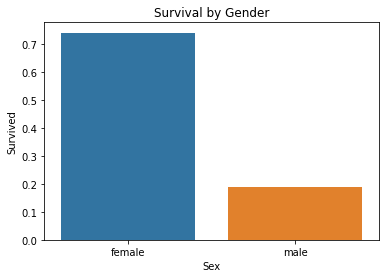

In [17]:
#Plotting a barplot of survival probability against sex

sns.barplot(x='Sex',y='Survived',data=gender); 
plt.title('Survival by Gender');

In [18]:
#Survival by location of Embarking

embark=train[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()
embark

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


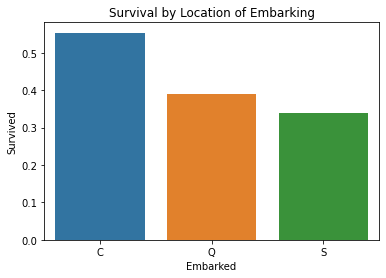

In [19]:
#Plotting a barplot of survival probability against location of embarking

sns.barplot(x='Embarked',y='Survived',data=embark);
plt.title('Survival by Location of Embarking');

In [20]:
#Survival by  Pclass

pclass= train[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()
pclass

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


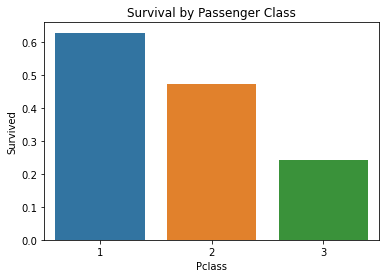

In [21]:
#Plotting a barplot of survival probability against passenger class

sns.barplot(x='Pclass',y='Survived',data=pclass);
plt.title('Survival by Passenger Class');

In [22]:
#Survival by Cabin

cabin=train[['Cabin','Survived']].groupby('Cabin',as_index=False).mean().sort_values(by='Survived',ascending=False)
cabin

,Cabin,Survived
3,D,0.757576
4,E,0.750000
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
1,B,0.327891


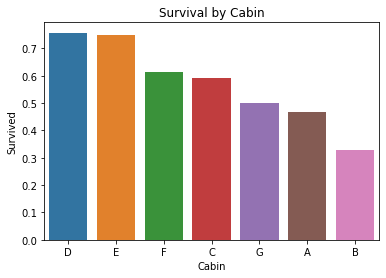

In [23]:
#Plotting a barplot of survival probability against cabin

sns.barplot(x='Cabin',y='Survived',data=cabin);
plt.title('Survival by Cabin');

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


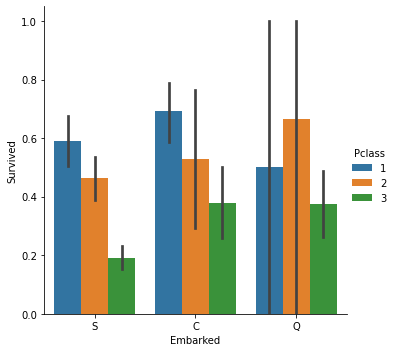

In [24]:
#Survival by location of embarking and Pclass

sns.factorplot(x='Embarked',y='Survived', hue='Pclass',data=train,kind='bar');


C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


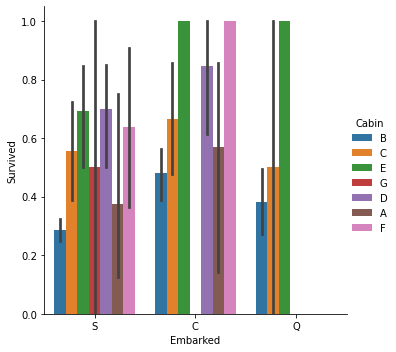

In [25]:
#Survival by location of embarking and cabin

sns.factorplot(x='Embarked',y='Survived', hue='Cabin',data=train,kind='bar');


C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


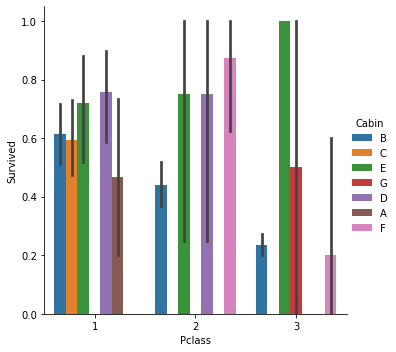

In [26]:
#Survival by Passenger Class and cabin 

sns.factorplot(x='Pclass',y='Survived', hue='Cabin',data=train,kind='bar');


##  Numerical Data

In [27]:
numeric= train[['Survived','Age','SibSp','Parch','Fare']] #My numeric columns
numeric.isna().sum() #No NULL cell

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

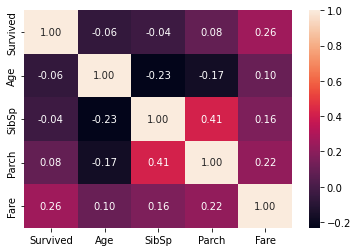

In [28]:
#Lets look at correlation
sns.heatmap(numeric.corr(),annot=True,fmt='.2f');

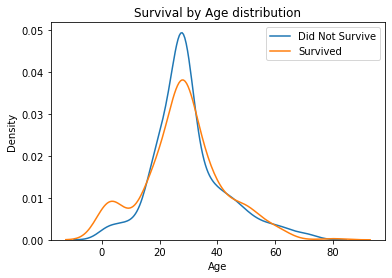

In [29]:
#survival by Age distribution
sns.kdeplot(train['Age'][train['Survived']==0],label='Did Not Survive')
sns.kdeplot(train['Age'][train['Survived']==1],label='Survived')
plt.xlabel('Age')
plt.legend()
plt.title('Survival by Age distribution');

In [30]:
#SibSp counts
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
#Survival by SibSp
Sibsp=train[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False)
Sibsp

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


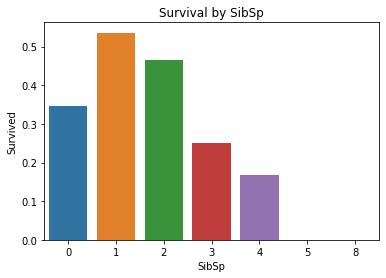

In [32]:
#Barplot
sns.barplot(x='SibSp',y='Survived',data=Sibsp)
plt.xlabel('SibSp')
plt.title('Survival by SibSp');

In [33]:
#Parch count
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [34]:
Parch=train[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending=False)
Parch

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


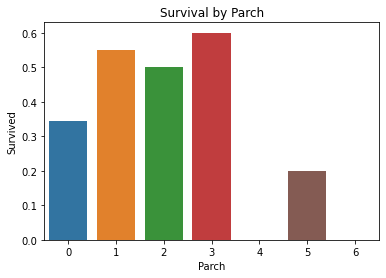

In [35]:
#Barplot
sns.barplot(x='Parch',y='Survived',data=Parch)
plt.title('Survival by Parch');

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


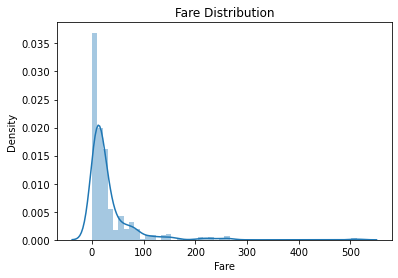

In [36]:
#Fare Distribution
sns.distplot(train['Fare'])
plt.title('Fare Distribution');

# 3. Data Preprocessing

In [37]:
#Combine both train and test
df= pd.concat([train,test],axis=0).reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,B,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,B,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,B,S


In [38]:
#Check for missing values
df.isna().sum() #Ignore the the survived column since we want to predict for the test

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [39]:
#Lets encode for sex column
df['Sex']=df['Sex'].map({'male':0,'female':1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,B,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,B,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,B,S


# 3.0 Data Transformation

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


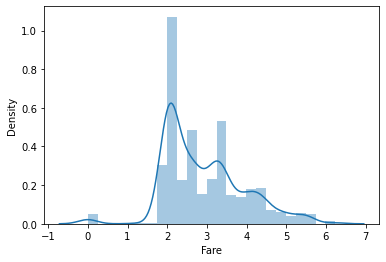

In [40]:
#Lets transform the fare data
df['Fare']=df['Fare'].map(lambda x: np.log(x) if x>0 else 0) #log transformation
sns.distplot(df['Fare']);

# 4. Feature Engineering and Encoding

## 4.0 Engineering

## 4.0.1 Title Column

In [41]:
#improving the name column
df['Title']= [df['Name'][i].split(',')[1].split('.')[0].strip() for i in df['Name'].index]
df[['Name','Title']].head() #We can clearly see that we obtained the right titles from the names.

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [42]:
#look at the unique titles
df['Title'].unique()  #18 unique titles are alot

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [43]:
#Lets group them into Mr,Miss,Mrs and Other

df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss') #Mlle is French for mademoiselle

df['Title']=df['Title'].replace('Mme','Mrs') #Mme is French for Madame(married woman)

df['Title']=df['Title'].replace(['Master', 'Don', 'Rev', 'Dr',  
       'Major', 'Lady', 'Sir',  'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'],'Other')


In [44]:
#Survival by title
Tt=df[['Title','Survived']].groupby('Title',as_index=False).mean().sort_values(by='Survived',ascending=False)
Tt  # It is clear women had a higher chance of survival while men had the least

,Title,Survived
2,Mrs,0.793651
0,Miss,0.702703
3,Other,0.492063
1,Mr,0.156673


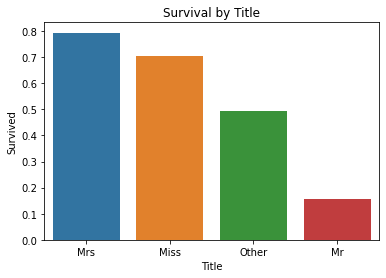

In [45]:
#Barplot
sns.barplot(x='Title',y='Survived',data=Tt)
plt.title("Survival by Title");

In [46]:
#We have no use for column Name now
df.drop(columns=['Name'],inplace=True)
df.head() #Now we only need to encode the last 2 columns

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,B,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,B,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,C,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,B,S,Mr


## 4.0.2 Family Size

In [47]:
#We'll look at if the passenger came alone or had family
df['Fam']= df['SibSp']+df['Parch']+1 #plus 1 for the passenger him/herself
df[['SibSp','Parch','Fam']].head()

,SibSp,Parch,Fam
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [48]:
#Create a column Alone either the passenger came alone=1 or came with family=0
df['Alone']=0
df.loc[df['Fam']==1,'Alone']=1
df['Alone'][:5]

0    0
1    0
2    1
3    0
4    1
Name: Alone, dtype: int64

In [49]:
#Survival by Alone

Alone=df[['Alone','Survived']].groupby('Alone',as_index=False).mean().sort_values(by='Survived',ascending=False)
Alone  # Those who were a alone had a lower probability of survival

,Alone,Survived
0,0,0.505650
1,1,0.303538


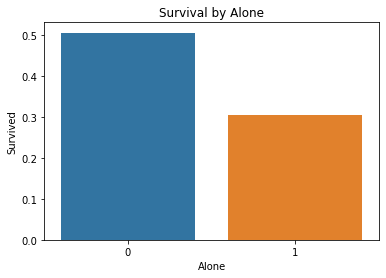

In [50]:
#Barplot
sns.barplot(x='Alone',y='Survived',data=Alone);
plt.title('Survival by Alone');

In [51]:
#Drop column SibSp,Parch,Fam
df.drop(['SibSp','Parch','Fam'],axis=1,inplace=True)
df.head()  #Now we only need to encode Cabin,Embarked and Title

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,0,22.0,1.981001,B,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,B,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,C,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,B,S,Mr,1


## 4.0.3 Age

In [52]:
#Create age class from our data
df['Age_Class']= pd.cut(df['Age'],5)
df[['Age_Class','Survived']].groupby('Age_Class',as_index=False).mean().sort_values(by='Age_Class')

,Age_Class,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.344168
2,"(32.102, 48.068]",0.404255
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


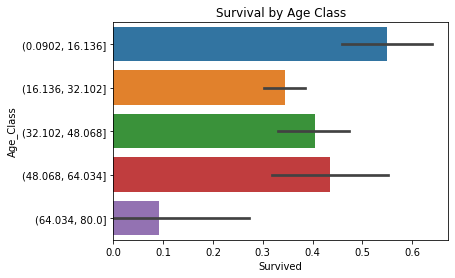

In [53]:
#Barplot
sns.barplot(y='Age_Class',x='Survived',orient='h',data= df);
plt.title('Survival by Age Class');

# Those btn age 0-16 had a higher chance of survival
# Those btn 64-80 had less chance of survival

In [54]:
#Datatype of Age
df['Age']=df['Age'].astype('int')
df.head() #It is now in interger form

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone,Age_Class
0,1,0.0,3,0,22,1.981001,B,S,Mr,0,"(16.136, 32.102]"
1,2,1.0,1,1,38,4.266662,C,C,Mrs,0,"(32.102, 48.068]"
2,3,1.0,3,1,26,2.070022,B,S,Miss,1,"(16.136, 32.102]"
3,4,1.0,1,1,35,3.972177,C,S,Mrs,0,"(32.102, 48.068]"
4,5,0.0,3,0,35,2.085672,B,S,Mr,1,"(32.102, 48.068]"


## 4.0.4 Fare

In [55]:
#Create the same class as before for fare
df['Fare_Class']= pd.cut(df['Fare'],5)
df[['Fare_Class','Survived']].groupby('Fare_Class',as_index=False).mean().sort_values(by= 'Fare_Class')

# Seems like the more fare the passenger paid the more likely the probability of survival.
# This can be explained by the higher probability of survival by the 1st class passenger.

,Fare_Class,Survived
0,"(-0.00624, 1.248]",0.066667
1,"(1.248, 2.496]",0.225627
2,"(2.496, 3.743]",0.431884
3,"(3.743, 4.991]",0.636364
4,"(4.991, 6.239]",0.689655


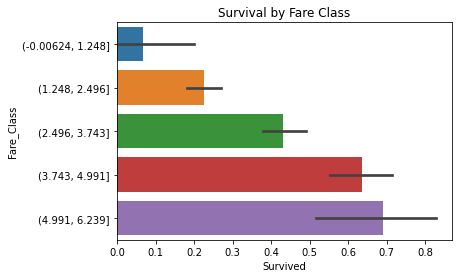

In [56]:
#Barplot
sns.barplot(y='Fare_Class',x='Survived',orient='h',data= df);
plt.title('Survival by Fare Class');

## 4.1 Encoding

In [57]:
#Encode the age classes

df.loc[df['Age'] < 16.136,'Age']=0
df.loc[(df['Age'] <= 32.102) & (df['Age']> 16.136),'Age'] = 1
df.loc[(df['Age'] <= 48.068) & (df['Age']> 32.102),'Age'] = 2
df.loc[(df['Age'] <= 64.034) & (df['Age']> 48.068),'Age'] = 3
df.loc[df['Age'] > 64.034,'Age'] = 4

In [58]:
#Drop the Age_Class column
df.drop('Age_Class',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone,Fare_Class
0,1,0.0,3,0,1,1.981001,B,S,Mr,0,"(1.248, 2.496]"
1,2,1.0,1,1,2,4.266662,C,C,Mrs,0,"(3.743, 4.991]"
2,3,1.0,3,1,1,2.070022,B,S,Miss,1,"(1.248, 2.496]"
3,4,1.0,1,1,2,3.972177,C,S,Mrs,0,"(3.743, 4.991]"
4,5,0.0,3,0,2,2.085672,B,S,Mr,1,"(1.248, 2.496]"


In [59]:
#Encoding the fare values
df.loc[df['Fare'] < 1.248,'Fare'] = 0
df.loc[(df['Fare'] <= 2.496) & (df['Fare']> 1.248),'Fare'] = 1
df.loc[(df['Fare']<= 3.743) & (df['Fare'] > 2.496),'Fare'] = 2
df.loc[(df['Fare'] <= 4.991) & (df['Fare'] > 3.743),'Fare'] = 3
df.loc[df['Fare'] > 4.991,'Fare'] = 4
df['Fare']= df['Fare'].astype('int') #Change datatype to integer

In [60]:
#Drop the Fare_Class column
df.drop('Fare_Class',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,0,1,1,B,S,Mr,0
1,2,1.0,1,1,2,3,C,C,Mrs,0
2,3,1.0,3,1,1,1,B,S,Miss,1
3,4,1.0,1,1,2,3,C,S,Mrs,0
4,5,0.0,3,0,2,1,B,S,Mr,1


In [61]:
#Encoding the remaining columns(Title,Cabin,Embarked)
df= pd.get_dummies(df)
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Alone,Cabin_A,Cabin_B,Cabin_C,...,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0.0,3,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,2,1.0,1,1,2,3,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,3,1.0,3,1,1,1,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,4,1.0,1,1,2,3,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,5,0.0,3,0,2,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,0,1,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1305,1306,NaN,1,1,2,3,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1306,1307,NaN,3,0,2,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1307,1308,NaN,3,0,1,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [62]:
#Now lets split our data to train and test
train= df[:len(train)]
test= df[len(train):]

In [63]:
#Drop the survived column from test since it's what we want to predict

test= test.drop('Survived',axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Alone,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
891,892,3,0,2,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
892,893,3,1,2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
893,894,2,0,3,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
894,895,3,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
895,896,3,1,1,2,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


# 5. Modelling

## 5.1 Model Libraries and Splitting Data

In [64]:
# My machine learning models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#Hyperparemeter search
from sklearn.model_selection import GridSearchCV

#For evaluating my model
from sklearn.model_selection import cross_val_score

In [65]:
#We begin by splitting data for training
X_train= train.drop(['Survived','PassengerId'],axis=1)
y_train= train['Survived']
X_test= test.drop('PassengerId',axis=1)
print('X_train Shape= ',X_train.shape)
print('y_train Shape= ',y_train.shape)
print('X_test Shape= ',X_test.shape)

X_train Shape=  (891, 19)
y_train Shape=  (891,)
X_test Shape=  (418, 19)


## 5.2 Fitting Models

In [66]:
#Fitting Models
logreg = LogisticRegression()
sgd = SGDClassifier()
svc = SVC()
lin_svc = LinearSVC()
rf = RandomForestClassifier()
knn= KNeighborsClassifier()
gnb = GaussianNB()
gbc= GradientBoostingClassifier()
tree = DecisionTreeClassifier()

In [67]:
#My list of models
models= [logreg,sgd,svc,lin_svc,rf,knn,gnb,gbc,tree]

In [68]:
#training models

#logreg
logreg.fit(X_train,y_train)
lr_score= round(logreg.score(X_train,y_train)*100,2)

#SGD
sgd.fit(X_train,y_train)
sgd_score= round(sgd.score(X_train,y_train)*100,2)

#SVC
svc.fit(X_train,y_train)
svc_score= round(svc.score(X_train,y_train)*100,2)

#LinearSVC
lin_svc.fit(X_train,y_train)
lsvc_score= round(lin_svc.score(X_train,y_train)*100,2)

#RandomForest
rf.fit(X_train,y_train)
rf_score= round(rf.score(X_train,y_train)*100,2)

#KNN
knn.fit(X_train,y_train)
knn_score= round(knn.score(X_train,y_train)*100,2)

#Gaussian
gnb.fit(X_train,y_train)
gnb_score= round(gnb.score(X_train,y_train)*100,2)

#GradientBoosting
gbc.fit(X_train,y_train)
gbc_score= round(gbc.score(X_train,y_train)*100,2)

#Decision Tree
tree.fit(X_train,y_train)
tree_score= round(tree.score(X_train,y_train)*100,2)

In [69]:
#Create a dataframe of models and their scores
model_scores= pd.DataFrame({'Model':['LogisticReg','StochasticGD','SupportVC','LinearSVC','RandomForest'
                                     ,'KNearest','GaussianNB','GradientBC','DecisionTree'],
                           'Score':[lr_score,sgd_score,svc_score,lsvc_score,rf_score,knn_score,gnb_score
                                    ,gbc_score,tree_score]})
model_scores.sort_values(by='Score',ascending=False,ignore_index=True)

#Random Forest had the best score out of the all algorithms

,Model,Score
0,RandomForest,88.44
1,DecisionTree,88.44
2,GradientBC,85.07
3,KNearest,84.06
4,SupportVC,82.49
5,LinearSVC,81.26
6,LogisticReg,81.03
7,GaussianNB,78.00
8,StochasticGD,75.42


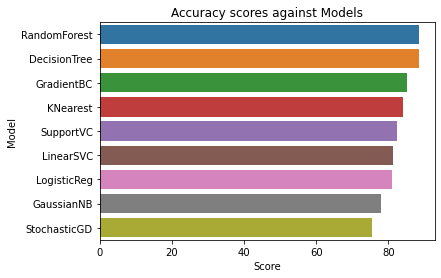

In [70]:
#Barplot
sns.barplot(x='Score',y='Model',orient='h',data=model_scores.sort_values(by='Score',ascending=False,ignore_index=True));
plt.title('Accuracy scores against Models');

## 5.3 Cross-Validation

In [71]:
#Cross validation results
cv_rlts=[]
for model in models:
    cv_rlts.append(cross_val_score(model,X_train,y_train,scoring='accuracy',cv=10))

In [72]:
#Mean of cross-validation
cv_mean=[]
for result in cv_rlts:
    cv_mean.append(result.mean())

In [73]:
# My cross validation dataframe. Sorted from the highest to lowest
my_cv= pd.DataFrame({'Cross-Validation Mean':cv_mean,
                     'Model':['LogisticReg','StochasticGD','SupportVC','LinearSVC','RandomForest'
                                     ,'KNearest','GaussianNB','GradientBC','DecisionTree']})
my_cv.sort_values(by='Cross-Validation Mean',ascending=False,ignore_index=True)

#Gradient boosting machines had the best score

,Cross-Validation Mean,Model
0,0.819313,GradientBC
1,0.817066,KNearest
2,0.811448,DecisionTree
3,0.810300,SupportVC
4,0.805855,LogisticReg
5,0.804707,RandomForest
6,0.803620,LinearSVC
7,0.782310,StochasticGD
8,0.772160,GaussianNB


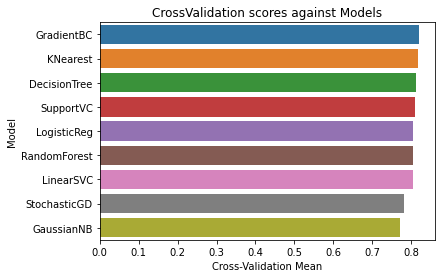

In [74]:
#Barplot
sns.barplot(x='Cross-Validation Mean',y='Model',orient='h',data= my_cv.sort_values(by='Cross-Validation Mean',
                                                                                   ascending=False,ignore_index=True));
plt.title('CrossValidation scores against Models');

## 5.4 Setting Hyperparameters

In [75]:
#import Scipy modules
from scipy.stats import uniform as unif
from scipy.stats import randint as rdt

In [76]:
# Setting range of my preferred parameters
parameters={'learning_rate':[0.001,0.01,0.1,1],
           'subsample':[1,2,3,4,5],
           'n_estimators':[1,10,100,1000],
           'max_depth':[1,2,3,4,5]}

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
# Performing GridSearch
grid= GridSearchCV(gbc,parameters,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END learning_rate=0.001, max_depth=1, n_estimators=1, subsample=1;, score=0.615 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=1, n_estimators=1, subsample=1;, score=0.618 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=1, n_estimators=1, subsample=1;, score=0.618 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=1, subsample=1;, score=0.618 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=1, n_estimators=1, subsample=1;, score=0.612 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=1, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=1, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=1, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=1, subsample=2;, s

[CV 2/5] END learning_rate=0.001, max_depth=1, n_estimators=1000, subsample=1;, score=0.803 total time=   1.9s
[CV 3/5] END learning_rate=0.001, max_depth=1, n_estimators=1000, subsample=1;, score=0.787 total time=   1.8s
[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=1000, subsample=1;, score=0.753 total time=   1.1s
[CV 5/5] END learning_rate=0.001, max_depth=1, n_estimators=1000, subsample=1;, score=0.787 total time=   1.2s
[CV 1/5] END learning_rate=0.001, max_depth=1, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=1, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=1, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=1, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 1/5] EN

[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=100, subsample=1;, score=0.612 total time=   0.1s
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=100, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=100, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=100, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=100, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=100, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=100, subsample=3;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=100, subsample=3;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=100, subsample=3;, score=nan total time=   0.0s
[CV 4/5] END learning_rate

[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=3;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=3;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=3;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=3;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=3;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=4;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=4;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.001, max

[CV 4/5] END learning_rate=0.001, max_depth=4, n_estimators=1, subsample=5;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=4, n_estimators=1, subsample=5;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=4, n_estimators=10, subsample=1;, score=0.615 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=4, n_estimators=10, subsample=1;, score=0.618 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=4, n_estimators=10, subsample=1;, score=0.618 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=4, n_estimators=10, subsample=1;, score=0.618 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=4, n_estimators=10, subsample=1;, score=0.612 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=4, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=4, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.

[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=1, subsample=1;, score=0.618 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=1, subsample=1;, score=0.618 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=1, subsample=1;, score=0.618 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=1, subsample=1;, score=0.612 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_

[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=1000, subsample=1;, score=0.798 total time=   5.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=1000, subsample=1;, score=0.837 total time=   5.2s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=1000, subsample=3;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=1000, subsample=3;, score=nan total time=   0.0s
[CV 3/5] END le

[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=100, subsample=5;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=100, subsample=5;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=100, subsample=5;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=100, subsample=5;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=100, subsample=5;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=1000, subsample=1;, score=0.793 total time=   1.6s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=1000, subsample=1;, score=0.809 total time=   1.4s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=1000, subsample=1;, score=0.792 total time=   1.1s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=1000, subsample=1;, score=0.775 total time=   1.1s
[CV 5/5] END learning_rat

[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=10, subsample=5;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=10, subsample=5;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=10, subsample=5;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=1;, score=0.749 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=1;, score=0.787 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=1;, score=0.820 total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=1;, score=0.792 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=1;, score=0.803 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.0

[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1;, score=0.618 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1;, score=0.618 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1;, score=0.618 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1;, score=0.612 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_d

[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=1, subsample=3;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=1, subsample=3;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=1, subsample=4;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=1, subsample=4;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=1, subsample=4;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=1, subsample=4;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=1, subsample=4;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=1, subsample=5;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=1, subsample=5;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimat

[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=1, subsample=1;, score=0.618 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=1, subsample=1;, score=0.618 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=1, subsample=1;, score=0.618 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=1, subsample=1;, score=0.612 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n

[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=1;, score=0.792 total time=   4.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=1;, score=0.871 total time=   4.3s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=3;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=3;, score=nan total time=   0.0s
[CV 3/5] END learning_ra

[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=100, subsample=3;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=100, subsample=3;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=100, subsample=3;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=100, subsample=4;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=100, subsample=4;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=100, subsample=4;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=100, subsample=4;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=100, subsample=4;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=100, subsample=5;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=1, n

[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=100, subsample=1;, score=0.799 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=100, subsample=1;, score=0.809 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=100, subsample=1;, score=0.826 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=100, subsample=1;, score=0.803 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=100, subsample=1;, score=0.848 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=100, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=100, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=100, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=100, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_

[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=1;, score=0.820 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=3;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=3;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=3;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estima

[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=1, subsample=3;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=1, subsample=3;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=1, subsample=4;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=1, subsample=4;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=1, subsample=4;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=1, subsample=4;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=1, subsample=4;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=1, subsample=5;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=1, subsample=5;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=1, sub

[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=1, subsample=1;, score=0.618 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=1, subsample=1;, score=0.618 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=1, subsample=1;, score=0.612 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=1, subsample=3;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=

[CV 2/5] END learning_rate=1, max_depth=1, n_estimators=1, subsample=1;, score=0.787 total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=1, n_estimators=1, subsample=1;, score=0.787 total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=1, n_estimators=1, subsample=1;, score=0.753 total time=   0.0s
[CV 5/5] END learning_rate=1, max_depth=1, n_estimators=1, subsample=1;, score=0.787 total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=1, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=1, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=1, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=1, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=1, max_depth=1, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=1, n_estimators=1, subsample=3;, s

[CV 3/5] END learning_rate=1, max_depth=2, n_estimators=1, subsample=1;, score=0.787 total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=2, n_estimators=1, subsample=1;, score=0.753 total time=   0.0s
[CV 5/5] END learning_rate=1, max_depth=2, n_estimators=1, subsample=1;, score=0.798 total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=2, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=2, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=2, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=2, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=1, max_depth=2, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=2, n_estimators=1, subsample=3;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=2, n_estimators=1, subsample=3;, sco

[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=1, subsample=1;, score=0.815 total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=1, subsample=3;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=1, subsample=3;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=1, subsample=3;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=1, subsample=3;, score=n

[CV 2/5] END learning_rate=1, max_depth=4, n_estimators=1, subsample=1;, score=0.787 total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=4, n_estimators=1, subsample=1;, score=0.843 total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=4, n_estimators=1, subsample=1;, score=0.764 total time=   0.0s
[CV 5/5] END learning_rate=1, max_depth=4, n_estimators=1, subsample=1;, score=0.837 total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=4, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=4, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=4, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=4, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=1, max_depth=4, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=4, n_estimators=1, subsample=3;, s

[CV 5/5] END learning_rate=1, max_depth=5, n_estimators=1, subsample=1;, score=0.815 total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=1, max_depth=5, n_estimators=1, subsample=2;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=5, n_estimators=1, subsample=3;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=5, n_estimators=1, subsample=3;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=5, n_estimators=1, subsample=3;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=5, n_estimators=1, subsample=3;, score=n

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [1, 10, 100, 1000],
                         'subsample': [1, 2, 3, 4, 5]},
             verbose=3)

In [79]:
# Finding my best parameters
print('Best Parameters: ',grid.best_params_)

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000, 'subsample': 1}


In [80]:
# Accuracy Score
gbc_tuned= GradientBoostingClassifier(learning_rate= 0.01,subsample=1,n_estimators=1000,max_depth=2)
gbc_tuned.fit(X_train,y_train)
y_pred= gbc_tuned.predict(X_test).astype('int')
my_score= round(gbc_tuned.score(X_train,y_train)*100,3)
my_score

83.726

# 6. Submission

In [81]:
submit= pd.DataFrame({'PassengerId': test['PassengerId'],'Survived': y_pred})
submit.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0


In [82]:
# Saving my submission file
submit.to_csv("submission.csv",index=False)